In [1]:
# Analysis Tools
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm

# Plotting Tools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Extra Plotting Tools Required for Bar Chart Race
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

# Plot Design Settings
sns.set_style("darkgrid", {"axes.facecolor": "#eff2f5", 'grid.color': '#c0ccd8', 'patch.edgecolor': '#B0B0B0', 'font.sans-serif': 'Verdana'})
sns.set_palette('Blues_d')

plt.rc('font', size=19)
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=17)
plt.rc('ytick', labelsize=17)
plt.rc('figure', titlesize=24)


# Mute warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
temp_data = pd.read_csv(r"C:\Users\willc\Documents\Project\Project\city_temperature.csv")
temp_data.shape


#reading in the .csv into a dataframe called "temp_data"  I wish I named it something shorter...

(2906327, 8)

In [4]:
temp_data.head()

#showing me the names of the columns in the dataset

Region  Country State     City  Month  Day  Year  AvgTemperature
0  Africa  Algeria   NaN  Algiers      1    1  1995            64.2
1  Africa  Algeria   NaN  Algiers      1    2  1995            49.4
2  Africa  Algeria   NaN  Algiers      1    3  1995            48.8
3  Africa  Algeria   NaN  Algiers      1    4  1995            46.4
4  Africa  Algeria   NaN  Algiers      1    5  1995            47.9

In [5]:
temp_data.info()

#showing me the data types for the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


In [6]:
temp_data['AvgTemperature'].describe()

count    2.906327e+06
mean     5.600492e+01
std      3.212359e+01
min     -9.900000e+01
25%      4.580000e+01
50%      6.250000e+01
75%      7.550000e+01
max      1.100000e+02
Name: AvgTemperature, dtype: float64

In [7]:
#I'd like to remove duplicate entries so later calculations don't get messed up

temp_data = temp_data.drop_duplicates()

In [8]:


for var in temp_data:
    print(var, ': ', temp_data[var].nunique())

Region :  7
Country :  125
State :  52
City :  321
Month :  12
Day :  32
Year :  28
AvgTemperature :  1517


In [9]:
temp_data.groupby('Month')['AvgTemperature'].count()

Month
1     250905
2     228765
3     250895
4     242755
5     245575
6     233856
7     241556
8     241444
9     233598
10    241291
11    233421
12    241551
Name: AvgTemperature, dtype: int64

In [10]:
for var in temp_data:
    print(var, ': ', temp_data[var].isnull().sum())

Region :  0
Country :  0
State :  1448805
City :  0
Month :  0
Day :  0
Year :  0
AvgTemperature :  0


In [11]:
temp_data = temp_data[temp_data['Day']>0]
print('1st Day: \n{}'.format(temp_data['Day'].agg([min]))) 

1st Day: 
min    1
Name: Day, dtype: int64


In [12]:
days_in_year = temp_data.groupby(['Year', 'Country'])['Day'].transform('size')

In [13]:
print('Coldest and hottest temperatures: \n{}'.format(temp_data['AvgTemperature'].agg([min , max])))

Coldest and hottest temperatures: 
min    -99.0
max    110.0
Name: AvgTemperature, dtype: float64


In [14]:
temp_data = temp_data[temp_data['AvgTemperature']>-98]
print('Coldest and hottest temperatures: \n{}'.format(temp_data['AvgTemperature'].agg([min]))) 

Coldest and hottest temperatures: 
min   -50.0
Name: AvgTemperature, dtype: float64


In [15]:
temp_data['AvgTemperature'] = (temp_data['AvgTemperature'] -32)*(5/9)

In [16]:
temp_data['AvgTemperature'].describe()

count    2.806369e+06
mean     1.577375e+01
std      1.061767e+01
min     -4.555556e+01
25%      8.555556e+00
50%      1.738889e+01
75%      2.438889e+01
max      4.333333e+01
Name: AvgTemperature, dtype: float64

In [17]:
temp_data = temp_data[temp_data['Year']>1994]
temp_data = temp_data[temp_data['Year']<2020]

#because there are typos outside these ranges, I'm cutting them out of the data frame

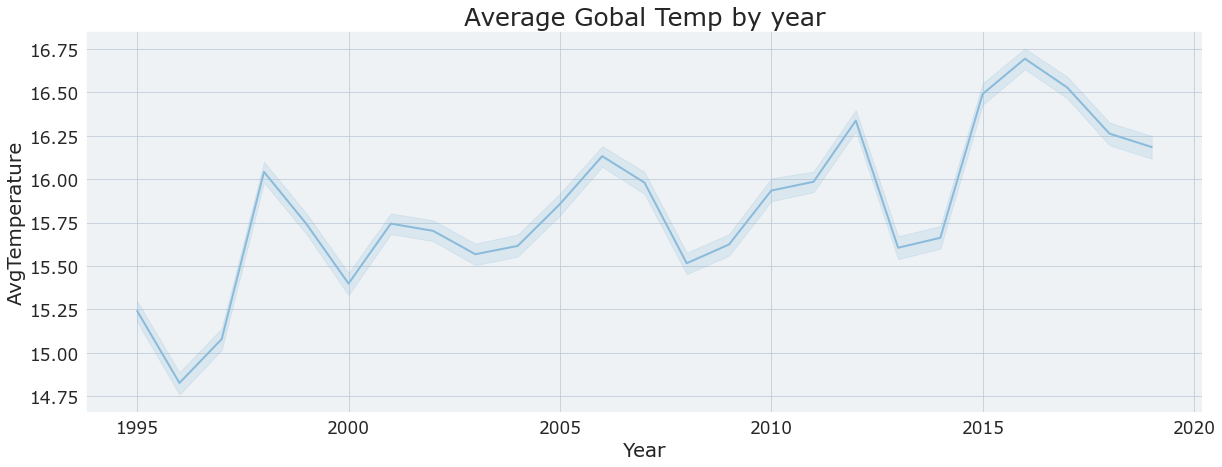

In [18]:
plt.figure(figsize=(20,7))
plt.title("Average Gobal Temp by year")
sns.lineplot(data=temp_data, x='Year', y='AvgTemperature', lw=2)
plt.show()

In [24]:
temp_data = temp_data.drop_duplicates()

In [26]:
temp_data.shape

#the funtion removed 20,010 duplicate entries

(2767895, 8)

In [19]:
before = np.round(temp_data['AvgTemperature'][temp_data['Year']==1995].mean(), decimals=2)
after = np.round(temp_data['AvgTemperature'][temp_data['Year']==2019].mean(), decimals=2)
percent = np.round(after-before, decimals=2)

print(f'Average World Temperature in 1995 is {before}\N{DEGREE SIGN}, and {after}\N{DEGREE SIGN} in 2019,\n and the temperature difference over this time period is {percent}\N{DEGREE SIGN} celcius')

Average World Temperature in 1995 is 15.24°, and 16.18° in 2019,
 and the temperature difference over this time period is 0.94° celcius


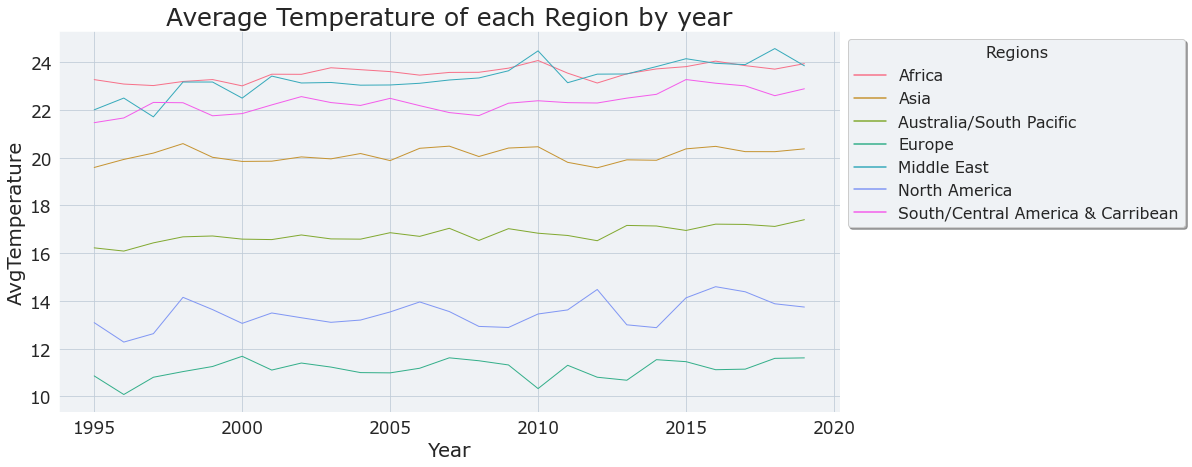

In [22]:
#Here, the 7 major regions of the world are separated and plotted seperately

temp_data = temp_data[['Region','AvgTemperature','Year']].groupby(['Region','Year']).mean()

plt.figure(figsize=(14,7))
plt.title("Average Temperature of each Region by year")
sns.lineplot(x='Year', y='AvgTemperature', hue='Region',
 units='Region',markers=True, dashes=False ,estimator=None, lw=1,data=temp_data)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, fontsize='small', title='Regions', title_fontsize = "16")
plt.show()

KeyError: 'Region'

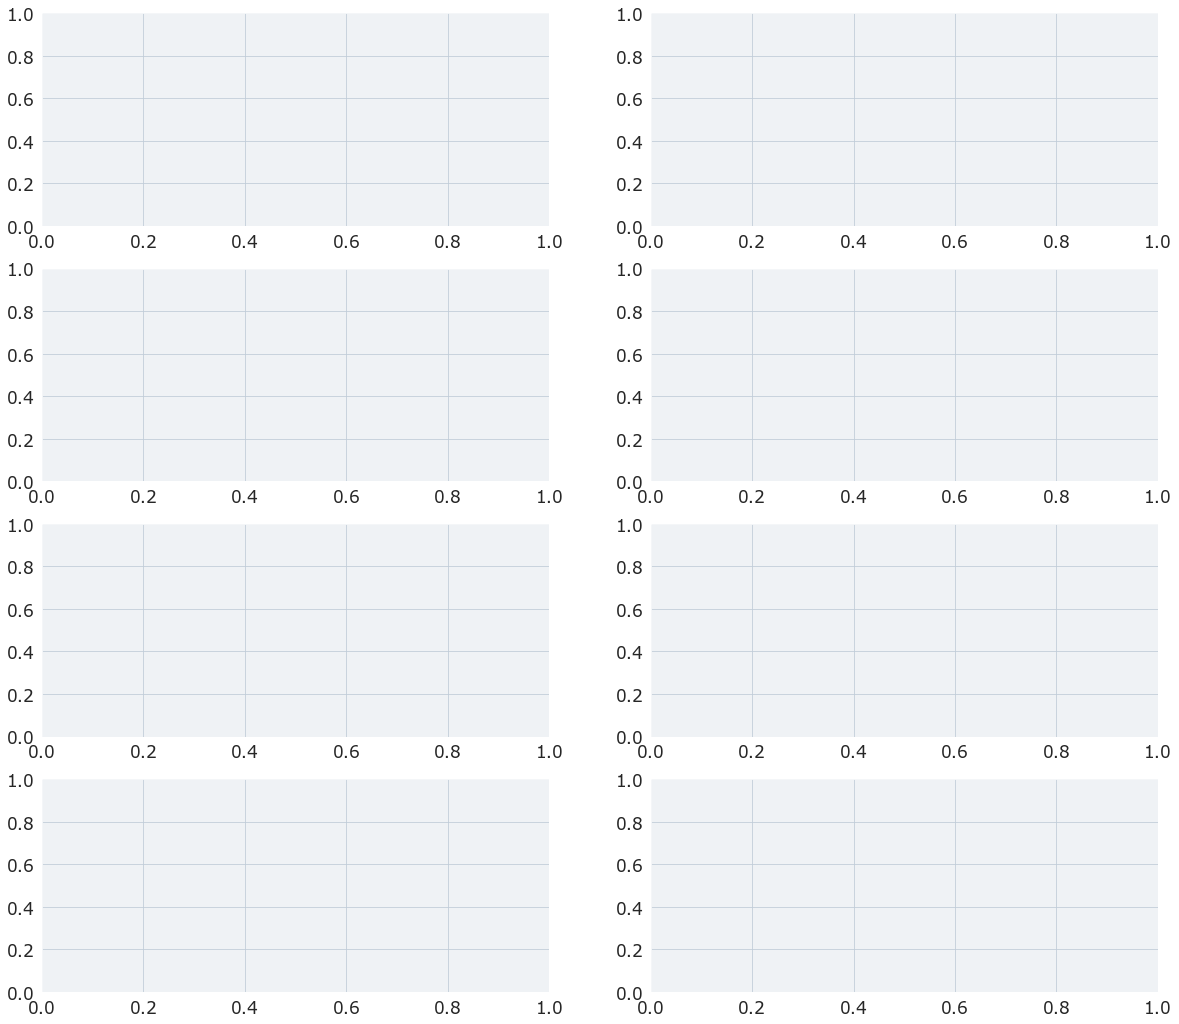

In [26]:
fig, ax = plt.subplots(4, 2, figsize = (20, 18))

    
# Grouping all Region Names
regions = temp_data['Region'].unique()
    
# Average Monthly Temp of each Region
for idx, (region, axes) in list(enumerate(zip(regions, ax.flatten()))):
        
    region_name = temp_data[temp_data['Region']==region]
    temp_data = region_name.groupby(['Month'])['AvgTemperature'].mean().reset_index().sort_values(by='AvgTemperature',ascending=False)
    sns.barplot(ax=axes,temp_data=temp_data, x='Month', y='AvgTemperature', palette="Blues_d").set_title(region)
        
### Removing empty figures
else:
    [axes.set_visible(False) for axes in ax.flatten()[idx + 1:]]
    
    
plt.tight_layout(pad=0.4, w_pad=2, h_pad=2)
plt.show()

In [32]:
plt.figure(figsize = (12, 12))
sns.relplot(data=temp_data, x='Year', y='AvgTemperature', hue='Region', col='Month',kind='line', col_wrap=4, linewidth=1)
plt.show()

ValueError: Could not interpret value `Month` for parameter `col`

<Figure size 864x864 with 0 Axes>